<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
#read the output file
df = pd.read_csv("output5D.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4500 non-null   int64  
 1   n                     4500 non-null   int64  
 2   m                     4500 non-null   int64  
 3   Dimension             4500 non-null   object 
 4   Distribution          4500 non-null   object 
 5   OPT                   4500 non-null   object 
 6   Plurality             4500 non-null   object 
 7   Plurality Distortion  4500 non-null   float64
 8   Copeland              4500 non-null   object 
 9   Copeland Distortion   4500 non-null   float64
 10  Borda                 4500 non-null   object 
 11  Borda Distortion      4500 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 422.0+ KB


In [ ]:
# #make sure all distortion columns are numeric
# df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
# df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
# df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
# df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
# df.info()

In [4]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,Borda,Borda Distortion
0,0,200,5,5D,normal,Candidate 2,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0
1,1,200,5,5D,normal,Candidate 0,Candidate 0,1.0,Candidate 0,1.0,Candidate 0,1.0
2,2,200,5,5D,normal,Candidate 4,Candidate 4,1.0,Candidate 4,1.0,Candidate 4,1.0
3,3,200,5,5D,normal,Candidate 2,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0
4,4,200,5,5D,normal,Candidate 3,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0


In [6]:
#group by distribution, n, m
group_by_all = df.groupby(["Distribution", "n", "m"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"))

In [7]:
group_by_all

Plurality_Distortion_avg  Plurality_Distortion_max  \
Distribution n   m                                                         
normal       200 5                    1.006566                  1.121839   
                 50                   1.077864                  1.402653   
                 100                  1.117705                  1.405015   
poisson      200 5                    1.004739                  1.112841   
                 50                   1.077424                  1.420943   
                 100                  1.131856                  1.475571   
uniform      200 5                    1.008634                  1.141406   
                 50                   1.108777                  1.370427   
                 100                  1.158874                  1.445281   

                      Copeland_Distortion_avg  Copeland_Distortion_max  \
Distribution n   m                                                       
normal       200 5                   1.000587                 1.029063   
                 50                  1.000889                 1.028534   
                 100                 1.000958                 1.029478   
poisson      200 5                   1.000629                 1.062146   
                 50                  1.000732                 1.033188   
                 100                 1.001178                 1.030212   
uniform      200 5                   1.000920                 1.045582   
                 50                  1.000871                 1.033897   
                 100                 1.000796                 1.020937   

                      Borda_Distortion_avg  Borda_Distortion_max  
Distribution n   m                                                
normal       200 5                1.000711              1.036768  
                 50               1.000681              1.019218  
                 100              1.000550              1.015130  
poisson      200 5                1.000995              1.059172  
                 50               1.000334              1.018085  
                 100              1.000413              1.012809  
uniform      200 5                1.001298              1.059789  
                 50               1.000476              1.021477  
                 100              1.000477              1.020564

In [8]:
group_by_distribution  = df.groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"))

In [9]:
group_by_distribution

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max
Distribution,,,,,,
normal,1.067378,1.405015,1.000811,1.029478,1.000647,1.036768
poisson,1.071340,1.475571,1.000847,1.062146,1.000581,1.059172
uniform,1.092095,1.445281,1.000862,1.045582,1.000750,1.059789


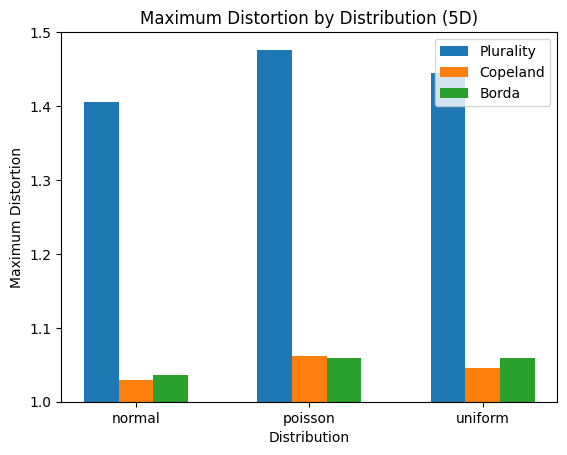

In [24]:

# Extract the data
distribution = group_by_distribution.index
plurality_max = group_by_distribution["Plurality_Distortion_max"]
copeland_max = group_by_distribution["Copeland_Distortion_max"]
borda_max = group_by_distribution["Borda_Distortion_max"]


# Set the width of each bar
bar_width = 0.2

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x, copeland_max, width=bar_width, label="Copeland")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (5D)")
plt.xticks(x, distribution)
plt.ylim(1,1.5)
plt.legend()

# Show the plot
plt.show()



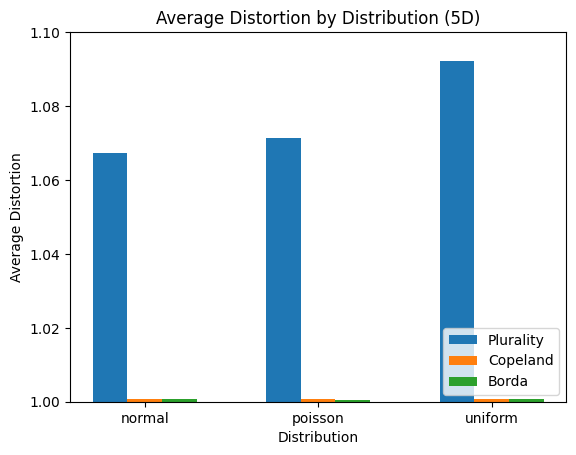

In [25]:
# Extract the data
distribution = group_by_distribution.index
plurality_avg = group_by_distribution["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution["Copeland_Distortion_avg"]
borda_avg = group_by_distribution["Borda_Distortion_avg"]


# Set the width of each bar
bar_width = 0.2

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (5D)")
plt.xticks(x, distribution)
plt.ylim(1,1.1)
plt.legend(loc='lower right')




In [14]:
group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"))
group_by_m

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max
m,,,,,,
5,1.006646,1.141406,1.000712,1.062146,1.001001,1.059789
50,1.088022,1.420943,1.000830,1.033897,1.000497,1.021477
100,1.136145,1.475571,1.000977,1.030212,1.000480,1.020564


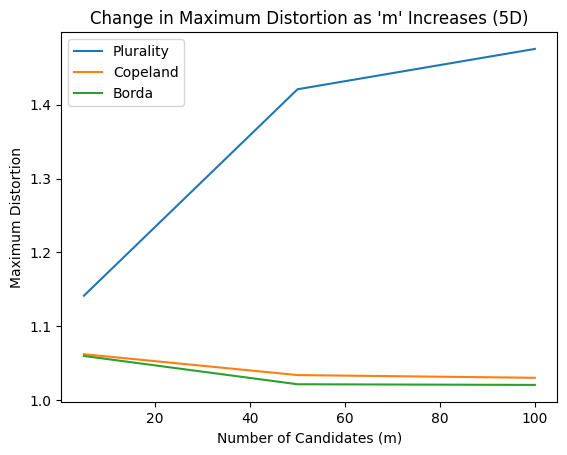

In [26]:
plt.plot(group_by_m.index, group_by_m["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_m.index, group_by_m["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_m.index, group_by_m["Borda_Distortion_max"], label="Borda")


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (5D)")
plt.legend()


# Show the plot
plt.show()

In [ ]:
# group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
# group_by_n

In [ ]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [17]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution = df.groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),


).reset_index()

In [18]:
accuracy_by_distribution

,Distribution,Plurality_percentage,Copeland_percentage,Borda_percentage
0,normal,36.466667,89.866667,91.000000
1,poisson,37.400000,89.666667,91.200000
2,uniform,30.533333,89.666667,90.533333


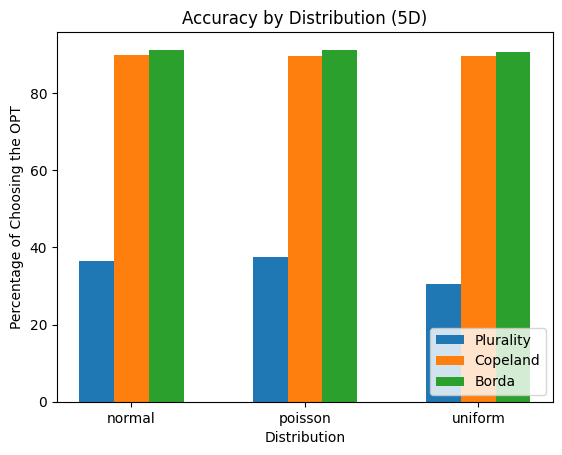

In [20]:
# Extract the data
distribution = accuracy_by_distribution["Distribution"]

# Set the width of each bar
bar_width = 0.2

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - bar_width, accuracy_by_distribution["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x, accuracy_by_distribution["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x + bar_width, accuracy_by_distribution["Borda_percentage"], width=bar_width, label="Borda")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Accuracy by Distribution (5D)")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [21]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_m = df.groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),

)
accuracy_by_m

,Plurality_percentage,Copeland_percentage,Borda_percentage
m,,,
5,80.8,93.466667,92.333333
50,16.4,89.133333,90.800000
100,7.2,86.600000,89.600000


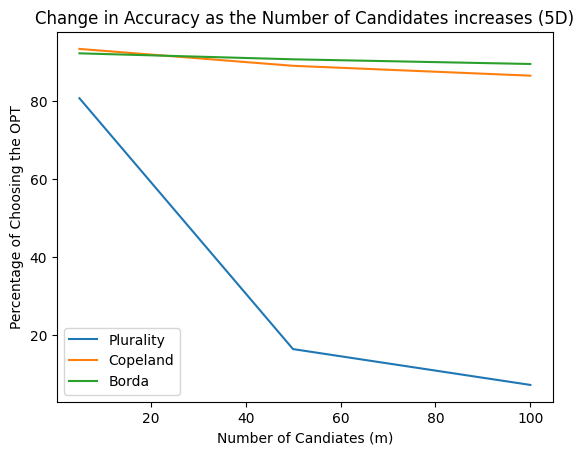

In [23]:
plt.plot(accuracy_by_m.index, accuracy_by_m["Plurality_percentage"], label="Plurality")
plt.plot(accuracy_by_m.index, accuracy_by_m["Copeland_percentage"], label="Copeland")
plt.plot(accuracy_by_m.index, accuracy_by_m["Borda_percentage"], label="Borda")


# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (5D)")
plt.legend()


# Show the plot
plt.show()